# 1. Objective

Notebook ini berisikan analisis perilaku konsumen meliputi informasi demografi dan preferensi pembelian.

# 2. Import Libraries

In [81]:
# Menghitung dan menampilkan dataframe
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Kontrol warning
import warnings
warnings.filterwarnings('ignore')

# Untuk Masalah Regresi
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor

# Split Dataset & Standarisasi Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

# Mengevaluasi Model Regresi
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Menyimpan model
import pickle

# Import fungsi chi2_contingency dari pustaka scipy stats
from scipy.stats import chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# 3. Data Loading

Saya akan mengakses 6 file dari mengantar yang berisikan detail ekspedisi komoditas ENOX.

In [82]:
# Memuat CSV file
IDExpress = pd.read_csv('iDExpress.csv')
print('5 Baris Awal Data IDExpress')
display(IDExpress.head())

JNT = pd.read_csv('J&T.csv')
print('5 Baris Awal Data JNT')
display(JNT.head())

JNE = pd.read_csv('JNE.csv')
print('5 Baris Awal Data JNE')
display(JNE.head())

NinjaExpress = pd.read_csv('NinjaExpress.csv')
print('5 Baris Awal Data NinjaExpress')
display(NinjaExpress.head())

SAP = pd.read_csv('SAP.csv')
print('5 Baris Awal Data SAP')
display(SAP.head())

SiCepat = pd.read_csv('SiCepat.csv')
print('5 Baris Awal Data SiCepat')
display(SiCepat.head())

5 Baris Awal Data IDExpress


,Order ID,Tracking ID,Customer Name,Customer Phone Number,Customer Address,Province,Subdistrict,City,ZIP Code,Weight,...,Assignee,Remark 1,Remark 2,Remark 3,Net Income,Return Fee,District,Estimated Delivery Date,Last Undelivered,Last Undelivered Date
0,'24120211ZDV2,'IDE7003618376724,MBAK RIN (BAKUL IWAK),6281253315881,"PATOKAN/CIRI RUMAH: ARAH PANTAI POPOH, PERTIGA...",JAWA TIMUR,TANGGULKUNDUNG,TULUNGAGUNG,66275,1,...,NaN,Hanna,1xENX-002,NaN,NaN,NaN,BESUKI,2-5 Days,NaN,NaN
1,'24120299EFVB,'IDE7003575132887,SURIDAH,6285261876419,"JLN MEULABOH T, TUAN, DUSUN PEMATANG KECAMATAN...",NANGGROE ACEH DARUSSALAM (NAD),PASI PINANG,ACEH BARAT,23615,1,...,NaN,Riska,1xRKT-001,NaN,NaN,NaN,MEUREUBO,2-5 Days,NaN,NaN
2,'241202NWFYN6,'IDE7003772351104,HJ. HASIMAH MUHAMADIA,6282217421023,JALAN POROS SENGKANG SULAWESI SELATAN BONE COM...,SULAWESI SELATAN,GONA,BONE,92776,1,...,NaN,Isabela,"2xRKT-001,1xENX-003",NaN,NaN,NaN,KAJUARA,2-5 Days,NaN,NaN
3,'241202H9K47N,'IDE7000495281522,TIKA,6282138661338,PATOKAN/CIRI RUMAH: SEBELAH MUSHOLA ISTIQOMAH ...,JAWA TENGAH,TAMBAKREJA,CILACAP,53213,1,...,NaN,Siska,1xRKT-001,NaN,NaN,NaN,CILACAP SELATAN,2-5 Days,NaN,NaN
4,'241123U0967E,'IDE7001473685765,NENENG IMARNINGSIH,6285720689725,KP PASIR KELAPA RT02RW06 KEL/DESA: KUTAJAYA KE...,JAWA BARAT,CISAAT,SUKABUMI,43359,1,...,NaN,Hanna,1xRKT-001,NaN,NaN,NaN,CICURUG,2-5 Days,NaN,NaN


5 Baris Awal Data JNT


,Order ID,Tracking ID,Customer Name,Customer Phone Number,Customer Address,Province,Subdistrict,City,ZIP Code,Weight,...,Assignee,Remark 1,Remark 2,Remark 3,Net Income,Return Fee,District,Estimated Delivery Date,Last Undelivered,Last Undelivered Date
0,'241203HOGYMG,'JO0307214989,ENI WALUYANTI,6281213197261,TOKO SURYA JAYA SPORT JLN AHMAD YANI NO 66 BUG...,KALIMANTAN TIMUR,GAYAM,BERAU,77315,1,...,NaN,Riska,1xRKT-001,NaN,NaN,NaN,TANJUNG REDEB,9-10 Days,NaN,NaN
1,'241203FP8ZDY,'JO0307001292,DESI RATNA SARI,6282163793912,MASTER CASH CREDIT PADANGSIDIMPUAN JLN SUDIRMA...,SUMATERA UTARA,PEMATANG MARIHAT,PEMATANG SIANTAR,21127,1,...,NaN,Riska,1xRKT-003,NaN,NaN,NaN,SIANTAR MARIMBUN,7-8 Days,NaN,NaN
2,'24120395LEQ3,'JO0307151251,SAKIYATUN NUFUS,6287809424408,PATOKAN/CIRI RUMAH:BELAKANG WARUNG WULAN KUBAN...,BANTEN,WARNASARI,CILEGON,42443,1,...,NaN,Hanna,1xRKT-003,NaN,NaN,NaN,CITANGKIL,4-5 Days,NaN,NaN
3,'241125MNMOG6,'JO0306411112,TINA,6285947719980,KANTOR KEC.BATALAIWORU KEL.LAIWORU JLN LUMBA L...,SULAWESI TENGGARA,SIDODADI,MUNA,93614,1,...,NaN,Hanna,1xRKT-001,NaN,NaN,NaN,BATALAIWARU (BATALAIWORU),8-9 Days,NaN,NaN
4,'241125M0F5KE,'JO0306719416,ANISA,62601112130998,PATOKAN: DEKAT ONE EARTH SCHOOL (SUNSET MODER...,BALI,PEMOGAN,DENPASAR,80221,1,...,NaN,Hanna,1xRKT-001,NaN,NaN,NaN,DENPASAR SELATAN,5-6 Days,Paket disimpan di gudang J&T,01 Dec 2024 13:24


5 Baris Awal Data JNE


,Order ID,Tracking ID,Customer Name,Customer Phone Number,Customer Address,Province,Subdistrict,City,ZIP Code,Weight,...,Assignee,Remark 1,Remark 2,Remark 3,Net Income,Return Fee,District,Estimated Delivery Date,Last Undelivered,Last Undelivered Date
0,'241112PKIUU9,'4119372400247329,RAHMADHANI SUCIANNA,6283153793477,JALAN SULTAN SHALAHUDDIN (WARUNG DAHAR SRIKAND...,KALIMANTAN TIMUR,LOA RAYA,KUTAI KARTANEGARA,75572,1,...,NaN,Isabela,"1xENX-002,1xENX-003",NaN,NaN,NaN,TENGGARONG SEBERANG,10 Days,NaN,NaN
1,'24111280HIHF,'4119372400247311,SALMITO,6285216319862,DESA BANTILANG. JLAN POROS PENDIDIKAN. RT. O7....,SULAWESI SELATAN,MAHALONA,LUWU TIMUR,92982,1,...,NaN,Riska,1xENX-003,NaN,NaN,NaN,TOWUTI,11 Days,NaN,NaN
2,'241025O7P980,'4119372400240993,IRMA/NAZLA,6285828294079,JLN DAWAK RT1 RW1 DAWAK KOTAWARINGIN LAMA KAB ...,KALIMANTAN TENGAH,KOTAWARINGIN HULU,KOTAWARINGIN BARAT,74161,1,...,NaN,Riska,"1xRKT-020,1xENX-003",NaN,NaN,NaN,KOTAWARINGIN LAMA,12 Days,INCOMPLETE CONSIGNEE ADDRESS,06 Nov 2024 22:31
3,'241025BX8Y01,'4119372400240985,YOHANA LOPES/JONI EDISON,6285847174875,"KORAMIL 02 MELOLO,KEL LUMBU KORE,KEC UMALULU,K...",NUSA TENGGARA TIMUR,LAI LANJANG,SUMBA TIMUR,87181,1,...,NaN,Riska,1xRKT-001,NaN,NaN,NaN,RINDI,15 Days,NaN,NaN
4,'2410213AE7Y3,'4119372400239540,RANTI,6281257043690,DESA WONOREJO RT/RW: 02/02 KECAMATAN PAMUKAN U...,KALIMANTAN SELATAN,MARGA JAYA,KOTABARU,72169,1,...,NaN,Hanna,1xRKT-001,NaN,NaN,NaN,PAMUKAN BARAT,15 Days,INCOMPLETE CONSIGNEE ADDRESS,18 Nov 2024 15:54


5 Baris Awal Data NinjaExpress


,Order ID,Tracking ID,Customer Name,Customer Phone Number,Customer Address,Province,Subdistrict,City,ZIP Code,Weight,...,Assignee,Remark 1,Remark 2,Remark 3,Net Income,Return Fee,District,Estimated Delivery Date,Last Undelivered,Last Undelivered Date
0,'240921Y3W5WM,'NXMMF000001012799,RIA CANTIKA,6281258912578,PATOKAN/CIRI RUMAH: SALON D'QUEEN SPA JL. SEND...,KALIMANTAN TIMUR,GELEO ASA,KUTAI BARAT,75776,1,...,NaN,Hanna,2xRKT-001,NaN,NaN,NaN,BARONG TONGKOK,2-5 Days,NaN,NaN


5 Baris Awal Data SAP


,Order ID,Tracking ID,Customer Name,Customer Phone Number,Customer Address,Province,Subdistrict,City,ZIP Code,Weight,...,Assignee,Remark 1,Remark 2,Remark 3,Net Income,Return Fee,District,Estimated Delivery Date,Last Undelivered,Last Undelivered Date
0,'2411061DH5UP,'MGT00184527559,BU MUJIATI,6281234419465,JLN UKA GG 13 NO 33 KEC BENOWO KEL SEMEMI KOTA...,JAWA TIMUR,SEMEMI,SURABAYA,60198,1.0,...,NaN,Suci,1xRKT-003,NaN,NaN,NaN,BENOWO,2 - 4 days,NaN,NaN
1,'2411018XPAGO,'MGT00184111646,ALEXANDER PATRAS,6282174063951,PATOKAN: JALAN TRANS SAMPING SARO NIFERO WOSIA...,MALUKU UTARA,TAGALAYA,HALMAHERA UTARA,97762,1.0,...,NaN,Hanna,1xRKT-001,NaN,NaN,NaN,TOBELO,5 - 9 days,[KURIR: FARABI HI ABTAR SAFI] [PENERIMA: ] [HU...,14 Nov 2024 11:12
2,'241028VCIDYH,'MGT00183689709,BU CITRA,6281267909209,PATOKAN/CIRI RUMAH: DI DEPAN BARAK SIANIPAR SU...,RIAU,SEI/SUNGAI MAJO,ROKAN HILIR,28991,1.0,...,NaN,Hanna,1xRKT-001,NaN,NaN,NaN,KUBU BABUSSALAM,4 - 7 days,NaN,NaN
3,'2410198AYOJ8,'MGT00182952171,MAMA KEMBAR,6281247136887,DESA/KEL: AL KAUSAR RT/RW: RT 07 KECAMATAN: ...,KALIMANTAN SELATAN,SEKAPUK,TANAH BUMBU,72275,1.0,...,NaN,Isabela,1xRKT-003,NaN,NaN,NaN,SATUI,4 - 7 days,NaN,NaN
4,'241016KA60F3,'MGT00182605489,BAHROINI,6281268724290,JL. KILANG PAPAN. SUNGAI KUBU HILIR. DESA SUNG...,RIAU,SEI/SUNGAI MAJO,ROKAN HILIR,28991,1.0,...,NaN,Riska,1xRKT-001,NaN,NaN,NaN,KUBU BABUSSALAM,4 - 7 days,NaN,NaN


5 Baris Awal Data SiCepat


,Order ID,Tracking ID,Customer Name,Customer Phone Number,Customer Address,Province,Subdistrict,City,ZIP Code,Weight,...,Assignee,Remark 1,Remark 2,Remark 3,Net Income,Return Fee,District,Estimated Delivery Date,Last Undelivered,Last Undelivered Date
0,'240621Z8NIVN,'001776158707,EVA,6282154586953,JON KEBUN SAWIT PT WNL EMPLASEMEN UTAMA CEMPAG...,KALIMANTAN TENGAH,CEMPAKA MULIA BARAT,Kab. Kotawaringin Timur,74354,1,...,NaN,Riska,1xRKT-001,NaN,NaN,NaN,CEMPAGA,7 - 9 Days,NaN,NaN


Data berhasil dimuat.

Di sini, saya akan menggabungkan ke-6 dataset di atas.

In [83]:
# menggabungkan dataset
df = pd.concat([IDExpress, JNT, JNE, NinjaExpress, SAP, SiCepat], axis=0)

# cek 
df.head()

,Order ID,Tracking ID,Customer Name,Customer Phone Number,Customer Address,Province,Subdistrict,City,ZIP Code,Weight,...,Assignee,Remark 1,Remark 2,Remark 3,Net Income,Return Fee,District,Estimated Delivery Date,Last Undelivered,Last Undelivered Date
0,'24120211ZDV2,'IDE7003618376724,MBAK RIN (BAKUL IWAK),6281253315881,"PATOKAN/CIRI RUMAH: ARAH PANTAI POPOH, PERTIGA...",JAWA TIMUR,TANGGULKUNDUNG,TULUNGAGUNG,66275,1.0,...,NaN,Hanna,1xENX-002,NaN,NaN,NaN,BESUKI,2-5 Days,NaN,NaN
1,'24120299EFVB,'IDE7003575132887,SURIDAH,6285261876419,"JLN MEULABOH T, TUAN, DUSUN PEMATANG KECAMATAN...",NANGGROE ACEH DARUSSALAM (NAD),PASI PINANG,ACEH BARAT,23615,1.0,...,NaN,Riska,1xRKT-001,NaN,NaN,NaN,MEUREUBO,2-5 Days,NaN,NaN
2,'241202NWFYN6,'IDE7003772351104,HJ. HASIMAH MUHAMADIA,6282217421023,JALAN POROS SENGKANG SULAWESI SELATAN BONE COM...,SULAWESI SELATAN,GONA,BONE,92776,1.0,...,NaN,Isabela,"2xRKT-001,1xENX-003",NaN,NaN,NaN,KAJUARA,2-5 Days,NaN,NaN
3,'241202H9K47N,'IDE7000495281522,TIKA,6282138661338,PATOKAN/CIRI RUMAH: SEBELAH MUSHOLA ISTIQOMAH ...,JAWA TENGAH,TAMBAKREJA,CILACAP,53213,1.0,...,NaN,Siska,1xRKT-001,NaN,NaN,NaN,CILACAP SELATAN,2-5 Days,NaN,NaN
4,'241123U0967E,'IDE7001473685765,NENENG IMARNINGSIH,6285720689725,KP PASIR KELAPA RT02RW06 KEL/DESA: KUTAJAYA KE...,JAWA BARAT,CISAAT,SUKABUMI,43359,1.0,...,NaN,Hanna,1xRKT-001,NaN,NaN,NaN,CICURUG,2-5 Days,NaN,NaN


## 3.1. Simple Exploration

In [84]:
# Informasi kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811 entries, 0 to 0
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 811 non-null    object 
 1   Tracking ID              811 non-null    object 
 2   Customer Name            811 non-null    object 
 3   Customer Phone Number    811 non-null    int64  
 4   Customer Address         811 non-null    object 
 5   Province                 811 non-null    object 
 6   Subdistrict              811 non-null    object 
 7   City                     811 non-null    object 
 8   ZIP Code                 811 non-null    int64  
 9   Weight                   811 non-null    float64
 10  COD                      749 non-null    float64
 11  Product Value            811 non-null    int64  
 12  Goods Description        811 non-null    object 
 13  Quantity                 811 non-null    int64  
 14  Delivery Instruction     811 non-

In [85]:
df.columns

Index(['Order ID', 'Tracking ID', 'Customer Name', 'Customer Phone Number',
       'Customer Address', 'Province', 'Subdistrict', 'City', 'ZIP Code',
       'Weight', 'COD', 'Product Value', 'Goods Description', 'Quantity',
       'Delivery Instruction', 'Sender Name', 'Sender Phone Number',
       'Create Date', 'Last Update', 'Last Status', 'Last POD Status',
       'Shipping Fee', 'Shipping Discount', 'COD Fee (Inc VAT)',
       'Estimated Pricing', 'Origin Code', 'Destination Code', 'Assignee',
       'Remark 1', 'Remark 2', 'Remark 3', 'Net Income', 'Return Fee',
       'District', 'Estimated Delivery Date', 'Last Undelivered',
       'Last Undelivered Date'],
      dtype='object')

Tidak ada whitespace. Jadi, tidak perlu dilakukan handling.

Sekarang mari cek missing values.

In [86]:
# cek missing values
missing_values = df.isna().sum()

# tampilkan kolom yang memiliki missing values
missing_values[missing_values>0]

COD                       62
COD Fee (Inc VAT)         62
Assignee                 811
Remark 1                  22
Remark 2                   3
Remark 3                 808
Net Income               811
Return Fee               811
Last Undelivered         638
Last Undelivered Date    638
dtype: int64

Dari 37 kolom, ternyata ada 10 di antaranya yang memiliki missing values.

## 3.2. Data Cleaning

### 3.2.1. Ubah Tipe Data

Ada 2 kolom no telepon yang mesti diubah dari integer menjadi object, yakni `ZIP Code`, `Customer Phone Number` dan `Sender Phone Number`.

In [87]:
# ubah tipe data
df['Customer Phone Number'] = df['Customer Phone Number'].astype(object)

df['Sender Phone Number'] = df['Sender Phone Number'].astype(object)

df['ZIP Code'] = df['ZIP Code'].astype(object)

In [88]:
# cek lagi

df['Sender Phone Number'].dtypes

dtype('O')

Selain itu, saya juga akan mengubah tipe data dari 2 kolom tanggal, yakni `Create Date` dan `Last Update`.

In [89]:
# Mengonversi kolom 'Create Date' menjadi tipe datetime dengan format yang benar
df['Create Date'] = pd.to_datetime(df['Create Date'], format='%d-%m-%Y %H:%M', errors='coerce')
df['Last Update'] = pd.to_datetime(df['Last Update'], format='%d-%m-%Y %H:%M', errors='coerce')

In [90]:
# cek lagi

display(df['Create Date'].dtypes)
display(df['Last Update'].dtypes)

dtype('<M8[ns]')

dtype('<M8[ns]')

Proses ini telah berhasil.

### Simpan Data Raw

Di sini, saya akan menyimpan data raw setelah mengubah tipe data kolom no telepon.

In [91]:
# Menyimpan DataFrame ke file Excel
df.to_excel('Laporan_Pengiriman_Paket_Sampai_20241203.xlsx', index=False, engine='openpyxl')

### 3.2.2. Tambahkan Kolom Time, Day, Month, Year

In [92]:
# Menambah kolom tahun, bulan, hari, dan tanggal
df['Year'] = df['Create Date'].dt.year
df['Month'] = df['Create Date'].dt.month
df['Day'] = df['Create Date'].dt.day
df['Weekday'] = df['Create Date'].dt.day_name() 
df['Hour'] = df['Create Date'].dt.hour          # Ekstrak jam

df.head()

,Order ID,Tracking ID,Customer Name,Customer Phone Number,Customer Address,Province,Subdistrict,City,ZIP Code,Weight,...,Return Fee,District,Estimated Delivery Date,Last Undelivered,Last Undelivered Date,Year,Month,Day,Weekday,Hour
0,'24120211ZDV2,'IDE7003618376724,MBAK RIN (BAKUL IWAK),6281253315881,"PATOKAN/CIRI RUMAH: ARAH PANTAI POPOH, PERTIGA...",JAWA TIMUR,TANGGULKUNDUNG,TULUNGAGUNG,66275,1.0,...,NaN,BESUKI,2-5 Days,NaN,NaN,2024,12,2,Monday,13
1,'24120299EFVB,'IDE7003575132887,SURIDAH,6285261876419,"JLN MEULABOH T, TUAN, DUSUN PEMATANG KECAMATAN...",NANGGROE ACEH DARUSSALAM (NAD),PASI PINANG,ACEH BARAT,23615,1.0,...,NaN,MEUREUBO,2-5 Days,NaN,NaN,2024,12,2,Monday,13
2,'241202NWFYN6,'IDE7003772351104,HJ. HASIMAH MUHAMADIA,6282217421023,JALAN POROS SENGKANG SULAWESI SELATAN BONE COM...,SULAWESI SELATAN,GONA,BONE,92776,1.0,...,NaN,KAJUARA,2-5 Days,NaN,NaN,2024,12,2,Monday,13
3,'241202H9K47N,'IDE7000495281522,TIKA,6282138661338,PATOKAN/CIRI RUMAH: SEBELAH MUSHOLA ISTIQOMAH ...,JAWA TENGAH,TAMBAKREJA,CILACAP,53213,1.0,...,NaN,CILACAP SELATAN,2-5 Days,NaN,NaN,2024,12,2,Monday,13
4,'241123U0967E,'IDE7001473685765,NENENG IMARNINGSIH,6285720689725,KP PASIR KELAPA RT02RW06 KEL/DESA: KUTAJAYA KE...,JAWA BARAT,CISAAT,SUKABUMI,43359,1.0,...,NaN,CICURUG,2-5 Days,NaN,NaN,2024,11,23,Saturday,13


### 3.2.1. Hapus Kolom Assignee

Karena kolom tersebutu seluruh missing values, maka saya hapus sebab itu dianggap tidak relevan.

In [93]:
# hapus kolom irelevan
df.drop(columns=['Assignee', 'COD Fee (Inc VAT)', 'Remark 2', 'Remark 3', 'Net Income', 'Return Fee', 'Last Undelivered', 'Last Undelivered Date', 'Delivery Instruction', 'Last POD Status', 'Origin Code',
       'Destination Code'], inplace=True)

# cek kolom
df.columns

Index(['Order ID', 'Tracking ID', 'Customer Name', 'Customer Phone Number',
       'Customer Address', 'Province', 'Subdistrict', 'City', 'ZIP Code',
       'Weight', 'COD', 'Product Value', 'Goods Description', 'Quantity',
       'Sender Name', 'Sender Phone Number', 'Create Date', 'Last Update',
       'Last Status', 'Shipping Fee', 'Shipping Discount', 'Estimated Pricing',
       'Remark 1', 'District', 'Estimated Delivery Date', 'Year', 'Month',
       'Day', 'Weekday', 'Hour'],
      dtype='object')

In [94]:
df.iloc[1]

Order ID                                                       '24120299EFVB
Tracking ID                                                'IDE7003575132887
Customer Name                                                        SURIDAH
Customer Phone Number                                          6285261876419
Customer Address           JLN MEULABOH T, TUAN, DUSUN PEMATANG KECAMATAN...
Province                                      NANGGROE ACEH DARUSSALAM (NAD)
Subdistrict                                                      PASI PINANG
City                                                              ACEH BARAT
ZIP Code                                                               23615
Weight                                                                   1.0
COD                                                                 227000.0
Product Value                                                         227000
Goods Description                 1 SERUM ENOX + 1 DAY CREAM + 1 NIGHT CREAM

In [95]:
df.shape

(811, 30)

In [96]:
df['Last Status'].value_counts()

Last Status
DELIVERED         631
RTS               171
OUTGOING            4
ON DELIVERY         2
INCOMING            1
RETURN PROCESS      1
CANCELED            1
Name: count, dtype: int64

### 3.2.2. Handling Missing Values

#### 3.2.2.1 COD

- Missing values pada kolom COD berarti dia melakukan transaksi non-COD atau transfer. 

- Jadi, missing values pada kolom tersebut tinggal diisi 0.

In [97]:
# handling missing values for COD column
df['COD'] = df['COD'].fillna(0)

In [98]:
# cek lagi
df.COD.isna().sum()

0

Handling missing values pada kolom `COD` berhasil.

#### 3.2.2.2 Remark 1

Missing values pada kolom ini akan diisi dengan string `Unknown`

In [99]:
# handling missing values for Remark 1 column
df['Remark 1'] = df['Remark 1'].fillna('Unknown')

In [100]:
# cek lagi
df['Remark 1'].isna().sum()

0

Handling missing values pada kolom `Remark 1` sukses.

Sebagai langkah akhir pada handling missing values ini, mari kita cek apakah ada kolom yang masih memiliki missing values.

In [101]:
# cek missing values
display(df.isna().sum())
print(f'Missing values masih terdapat di {df.isna().sum().sum()} kolom')

Order ID                   0
Tracking ID                0
Customer Name              0
Customer Phone Number      0
Customer Address           0
Province                   0
Subdistrict                0
City                       0
ZIP Code                   0
Weight                     0
COD                        0
Product Value              0
Goods Description          0
Quantity                   0
Sender Name                0
Sender Phone Number        0
Create Date                0
Last Update                0
Last Status                0
Shipping Fee               0
Shipping Discount          0
Estimated Pricing          0
Remark 1                   0
District                   0
Estimated Delivery Date    0
Year                       0
Month                      0
Day                        0
Weekday                    0
Hour                       0
dtype: int64

Missing values masih terdapat di 0 kolom


Tampaknya, sudah tidak ada lagi missing values.

# 4. EDA

## 4.1. Menampilkan Jumlah Unique Values di Tiap Kolom

In [102]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"Jumlah nilai unik di kolom '{col}': {unique_count}")

Jumlah nilai unik di kolom 'Order ID': 811
Jumlah nilai unik di kolom 'Tracking ID': 811
Jumlah nilai unik di kolom 'Customer Name': 649
Jumlah nilai unik di kolom 'Customer Phone Number': 666
Jumlah nilai unik di kolom 'Customer Address': 743
Jumlah nilai unik di kolom 'Province': 36
Jumlah nilai unik di kolom 'Subdistrict': 601
Jumlah nilai unik di kolom 'City': 240
Jumlah nilai unik di kolom 'ZIP Code': 580
Jumlah nilai unik di kolom 'Weight': 2
Jumlah nilai unik di kolom 'COD': 166
Jumlah nilai unik di kolom 'Product Value': 173
Jumlah nilai unik di kolom 'Goods Description': 56
Jumlah nilai unik di kolom 'Quantity': 1
Jumlah nilai unik di kolom 'Sender Name': 2
Jumlah nilai unik di kolom 'Sender Phone Number': 2
Jumlah nilai unik di kolom 'Create Date': 269
Jumlah nilai unik di kolom 'Last Update': 384
Jumlah nilai unik di kolom 'Last Status': 7
Jumlah nilai unik di kolom 'Shipping Fee': 111
Jumlah nilai unik di kolom 'Shipping Discount': 147
Jumlah nilai unik di kolom 'Estimated 

## 4.2. Statistik

In [103]:
# cek statistik
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Weight,811.0,0.999383,0.5,1.0,1.0,1.0,1.0,0.017557
COD,811.0,209718.865598,0.0,204000.0,214000.0,240000.0,801000.0,84167.758712
Product Value,811.0,222496.917386,50000.0,204000.0,215000.0,243000.0,801000.0,64741.272755
Quantity,811.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Create Date,811,2024-09-04 14:46:45.943279872,2024-06-13 09:06:00,2024-07-27 13:22:00,2024-09-12 13:25:00,2024-10-12 13:24:30,2024-12-03 13:11:00,NaN
Last Update,811,2024-09-11 06:02:45.573366016,2024-06-19 20:05:00,2024-08-04 08:01:00,2024-09-20 14:34:00,2024-10-19 10:14:30,2024-12-05 13:30:00,NaN
Shipping Fee,811.0,34675.782491,7000.0,17000.0,26000.0,53000.0,124000.0,23915.288443
Shipping Discount,811.0,9563.686806,100.0,4800.0,7500.0,14400.0,37200.0,7204.63526
Estimated Pricing,811.0,32095.795931,7000.0,17576.5,25493.0,45542.0,95591.0,17892.219521
Year,811.0,2024.0,2024.0,2024.0,2024.0,2024.0,2024.0,0.0


## 4.3. Korelasi Data

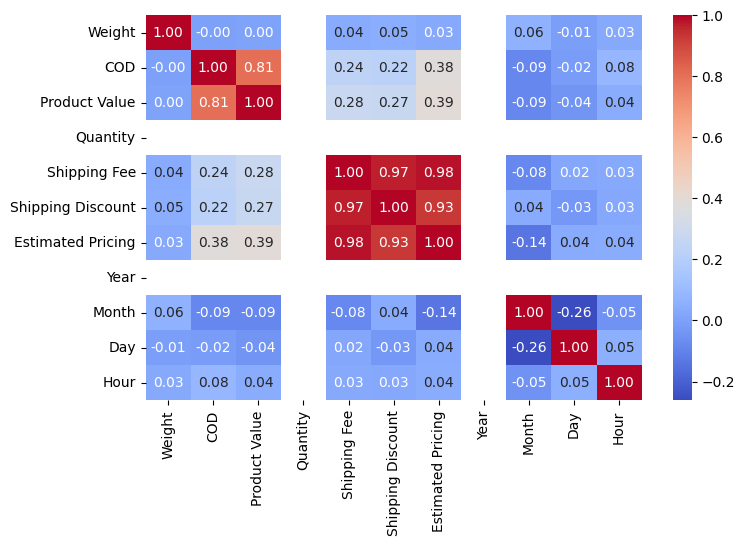

In [104]:
fig, ax = plt.subplots(figsize=(8, 5))
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', fmt='.2f')
plt.show()


## 4.4. Omzet Per Provinsi 

In [106]:
delivered = df[df['Last Status']=='DELIVERED']

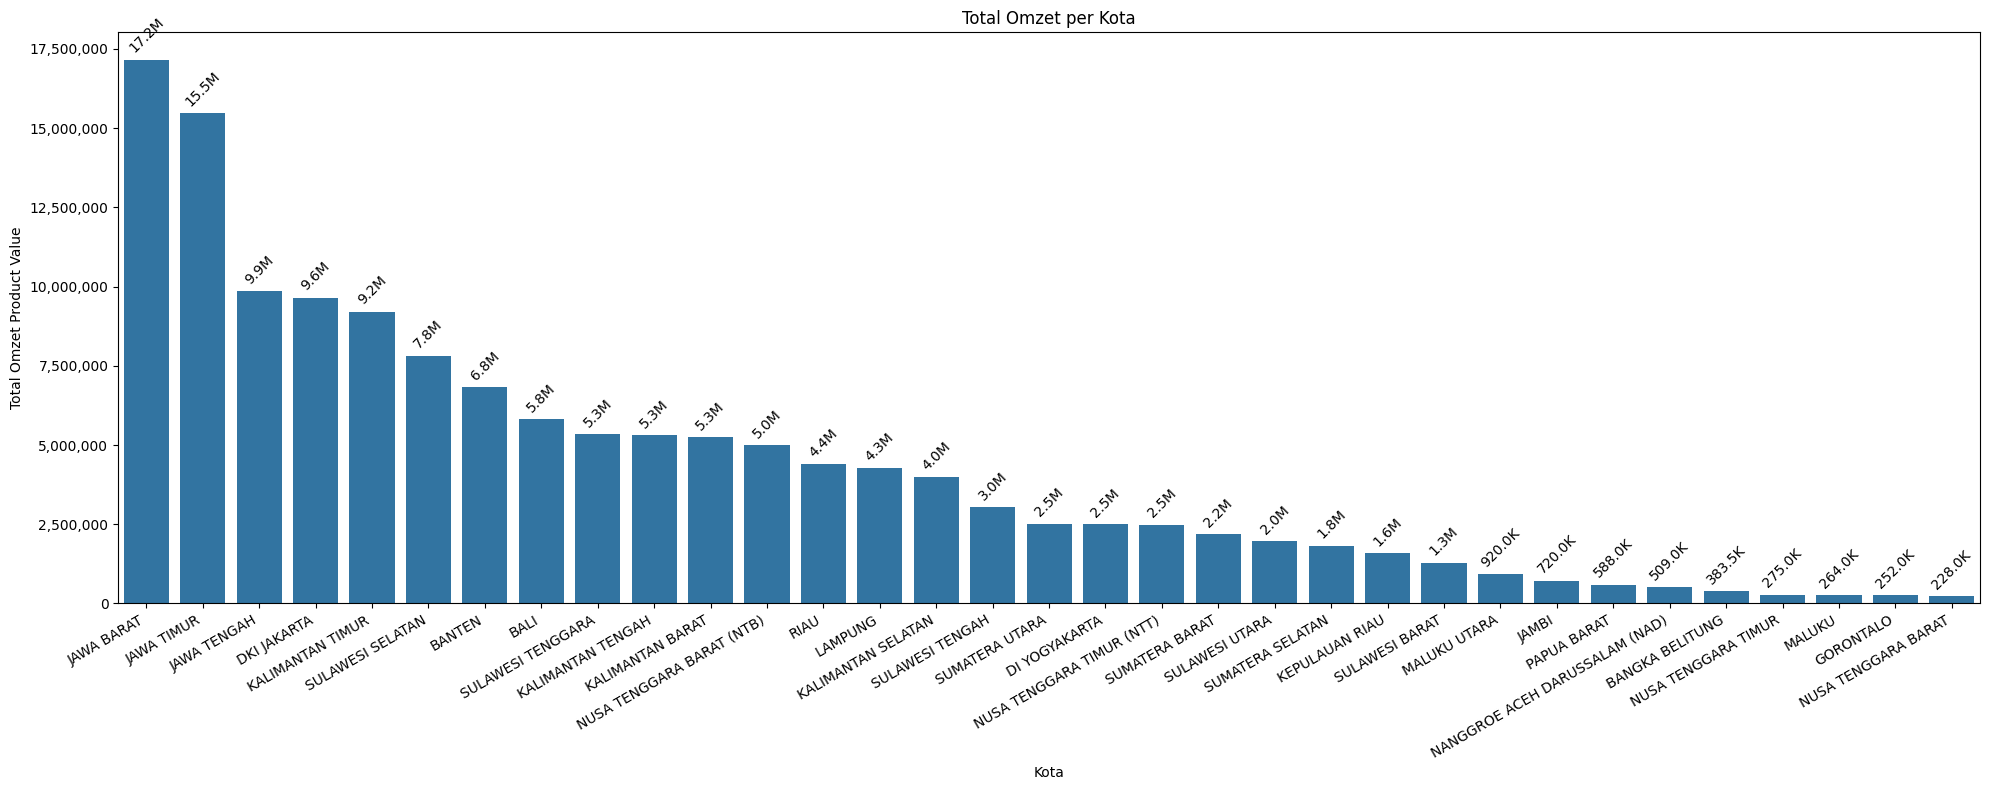

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Menghitung total COD per kota
total_omzet_per_city = delivered.groupby('Province')['Product Value'].sum().reset_index()
total_omzet_per_city = total_omzet_per_city.sort_values(by='Product Value', ascending=False)

# Fungsi untuk memformat angka ke dalam format ringkas
def format_angka(value):
    if value >= 1e6:
        return f'{value/1e6:.1f}M'  # Format juta
    elif value >= 1e3:
        return f'{value/1e3:.1f}K'  # Format ribu
    else:
        return f'{value:.0f}'  # Angka biasa

# Visualisasi
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Province', y='Product Value', data=total_omzet_per_city)

# Menambahkan label besaran omzet di atas setiap bar dengan rotasi 45 derajat
for container in ax.containers:
    ax.bar_label(
        container, 
        labels=[format_angka(val) for val in container.datavalues],  # Menggunakan format angka yang lebih ringkas
        label_type='edge', 
        fontsize=10, 
        padding=3, 
        rotation=45  # Rotasi label
    )

# Mengatur format sumbu y agar tidak menggunakan notasi ilmiah
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Total Omzet per Kota')
plt.xlabel('Kota')
plt.ylabel('Total Omzet Product Value')
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

## 4.5. Jumlah Transaksi per Bulan

Kita akan mencari tahu jumlah transaksi tiap bulannya. Dengan begitu, kita bisa mengetahui tren volume transaksi kita sedang naik atau turun.

In [110]:
# hitung jumlah transaksi per bulan
jumlah_transaksi_per_bulan = df.groupby('Month')['Order ID'].nunique()
jumlah_transaksi_per_bulan

Month
6     107
7     113
8     140
9     137
10    256
11     51
12      7
Name: Order ID, dtype: int64

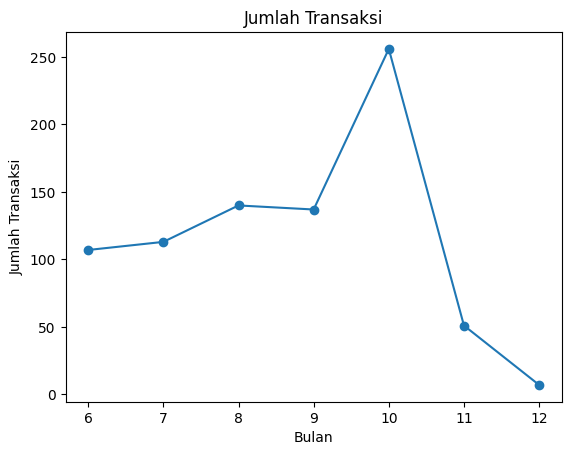

In [111]:
# plot jumlah pesanan per bulan
plt.plot(jumlah_transaksi_per_bulan.index,jumlah_transaksi_per_bulan.values, marker='o');

# menambahkan judul
plt.title('Jumlah Transaksi')

# menmbahkan label sumbu x dan y
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi');

Dari sini, kita mengetahui sempat terjadi peningkatan jumlah transaksi signifikan pada bulan ke-10 (Oktober). Kemudian terjadi tren penurunan di bulan berikutnya, yakni November.

## 4.6. Sales Volume by Product

Dari sini, kita bisa melihat sales volume tiap produknya sekaligus melihat proporsinya masing-masing kategori.

In [119]:
# mencari tahu jumlah kemunculan masing-masing kategori tiap transaksi
delivered['Goods Description'].value_counts()

Goods Description
1 SERUM ENOX + 1 DAY CREAM + 1 NIGHT CREAM                                398
1 SABUN + 1 SERUM ENOX + 1 DAY CREAM + 1 NIGHT CREAM                       56
1 SERUM + 1 DAY CREAM + 1 NIGHT CREAM                                      31
1 SERUM ENOX                                                               21
1 SERUM ENOX (KU)                                                          16
1 NIGHT CREAM                                                              12
3 SABUN + 1 SERUM ENOX + 1 DAY CREAM + 1 NIGHT CREAM                        9
1 SABUN + 1 SERUM ENOX                                                      7
1 SERUM ENOX + 1 NIGHT CREAM                                                5
1 DAY CREAM ENOX                                                            5
1 SABUN PHYLLIA                                                             5
1 DAY CREAM                                                                 5
2 SERUM ENOX + 1 DAY CREAM + 1 NIGHT CREAM    

Mari kita lihat bagaimana grafik sales volume saat kita masukkan ke bar chart.

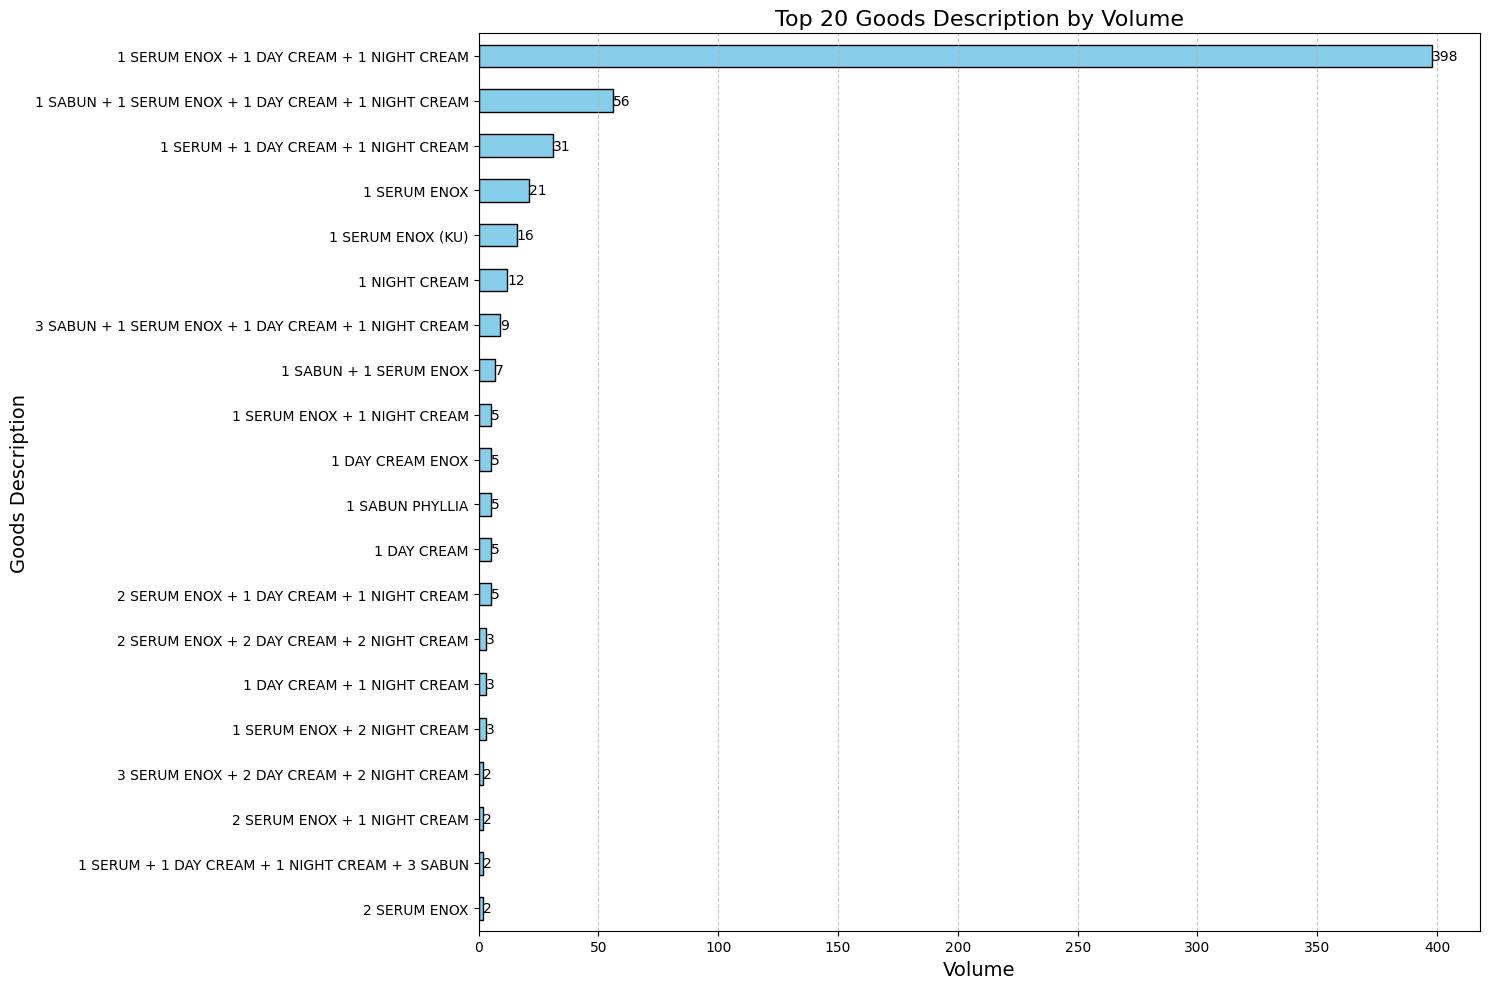

In [120]:
import matplotlib.pyplot as plt

# Mengatur ukuran figure agar lebih besar dan proporsional
plt.figure(figsize=(15,10))

# Membatasi jumlah barang (opsional) - menampilkan 20 barang teratas
top_items = delivered['Goods Description'].value_counts().head(20)

# Membuat bar chart horizontal dengan warna lebih sederhana
ax = top_items.plot(kind='barh', color='skyblue', edgecolor='black')

# Menambahkan label pada setiap bar
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge')

# Menambahkan judul dan label sumbu
plt.title('Top 20 Goods Description by Volume', fontsize=16)
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Goods Description', fontsize=14)

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Membalik urutan sumbu y agar produk dengan volume terbesar di atas
plt.gca().invert_yaxis()

# Menampilkan grafik
plt.tight_layout()
plt.show()


## 4.7. Sales Volume by Time Period

In [123]:
# menghitung volume by time period
vol_by_period = delivered.groupby('Month')['Product Value'].sum()
vol_by_period

Month
6     18712000
7     20187000
8     22331000
9     24175000
10    43779000
11     9277000
12      435000
Name: Product Value, dtype: int64

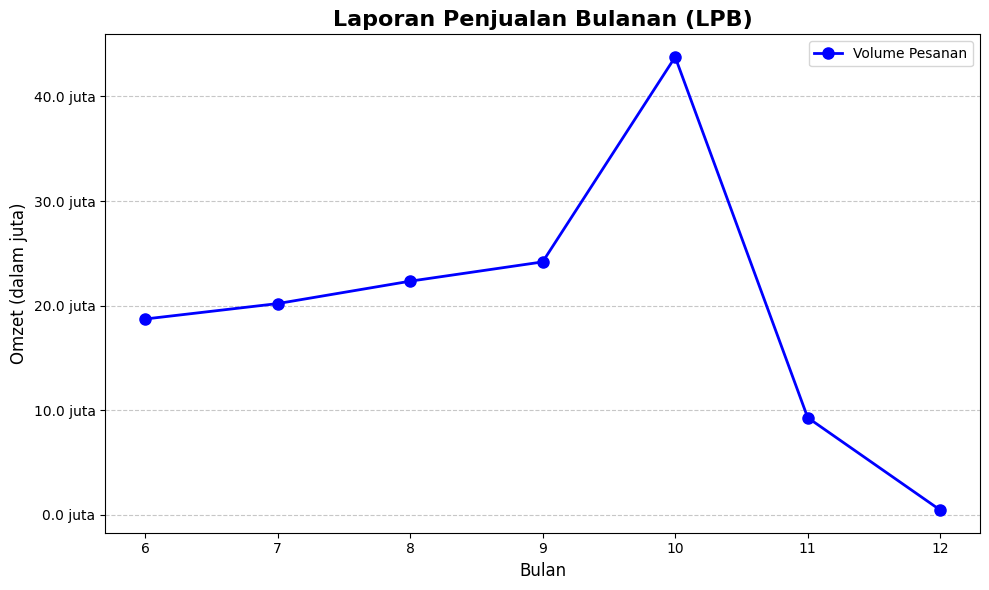

In [137]:
from matplotlib.ticker import FuncFormatter

# Menghitung volume by time period
vol_by_period = delivered.groupby('Month')['Product Value'].sum()

# Membuat fungsi formatter untuk mengubah angka menjadi format "juta"
def juta_formatter(x, pos):
    return f'{x / 1e6:.1f} juta'

# Membuat plot
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot
plt.plot(
    vol_by_period.index, 
    vol_by_period.values, 
    marker='o', 
    linestyle='-', 
    color='blue', 
    markersize=8, 
    linewidth=2, 
    label='Volume Pesanan'
)

# Menambahkan judul
plt.title('Laporan Penjualan Bulanan (LPB)', fontsize=16, weight='bold')

# Menambahkan label sumbu x dan y
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Omzet (dalam juta)', fontsize=12)

# Menggunakan formatter untuk sumbu y
plt.gca().yaxis.set_major_formatter(FuncFormatter(juta_formatter))

# Menambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legenda
plt.legend(fontsize=10)

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

- Di sini terlihat pada bulan ke-6 (Juni), produk yang terjual versi ekspedisi Mengantar beromzet hampir Rp 20 juta. 

- Omzet pun naik perlahan pada tiga bulan berikutnya.

- Puncaknya, pada bulan ke-10 (Oktober), omzet mencapai sekitar Rp 40 juta lebih.

## 4.8 Sales Volume by CS

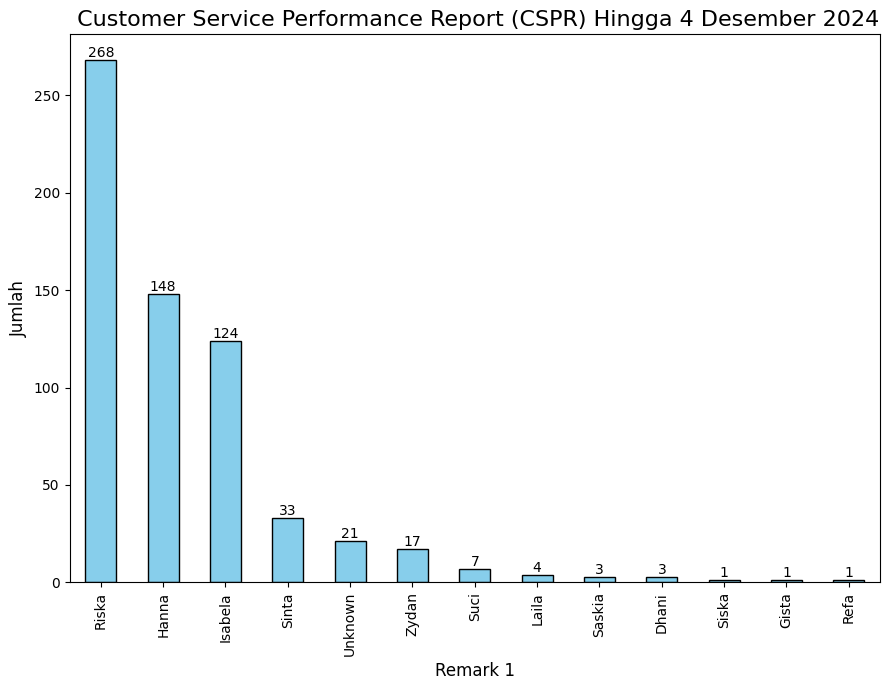

In [138]:
# Mengatur ukuran figure
plt.figure(figsize=(9, 7))

# Membuat bar plot
ax = delivered['Remark 1'].value_counts().plot(
    kind='bar', 
    color='skyblue',  # Menambahkan warna pada bar
    edgecolor='black' # Menambahkan garis tepi pada bar
)

# Memberikan judul dan label sumbu
plt.title(' Customer Service Performance Report (CSPR) Hingga 4 Desember 2024', fontsize=16)
plt.xlabel('Remark 1', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menambahkan nilai pada setiap bar
for index, value in enumerate(delivered['Remark 1'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

Selain itu, kita akan melihat 

Laporan Kinerja Customer Service Per Bulan:
    Month Remark 1  Jumlah_Pesanan
0       6    Hanna              43
1       6    Riska              37
2       6  Unknown               1
3       7    Gista               1
4       7    Hanna              31
5       7  Isabela               2
6       7    Laila               4
7       7     Refa               1
8       7    Riska              39
9       7    Sinta               9
10      8    Hanna              20
11      8  Isabela              16
12      8    Riska              50
13      8    Sinta              12
14      8  Unknown               2
15      8    Zydan               1
16      9    Dhani               1
17      9    Hanna              24
18      9  Isabela              21
19      9    Riska              49
20      9    Sinta              10
21      9     Suci               3
22      9  Unknown               2
23      9    Zydan               1
24     10    Dhani               2
25     10    Hanna              22
26     10  

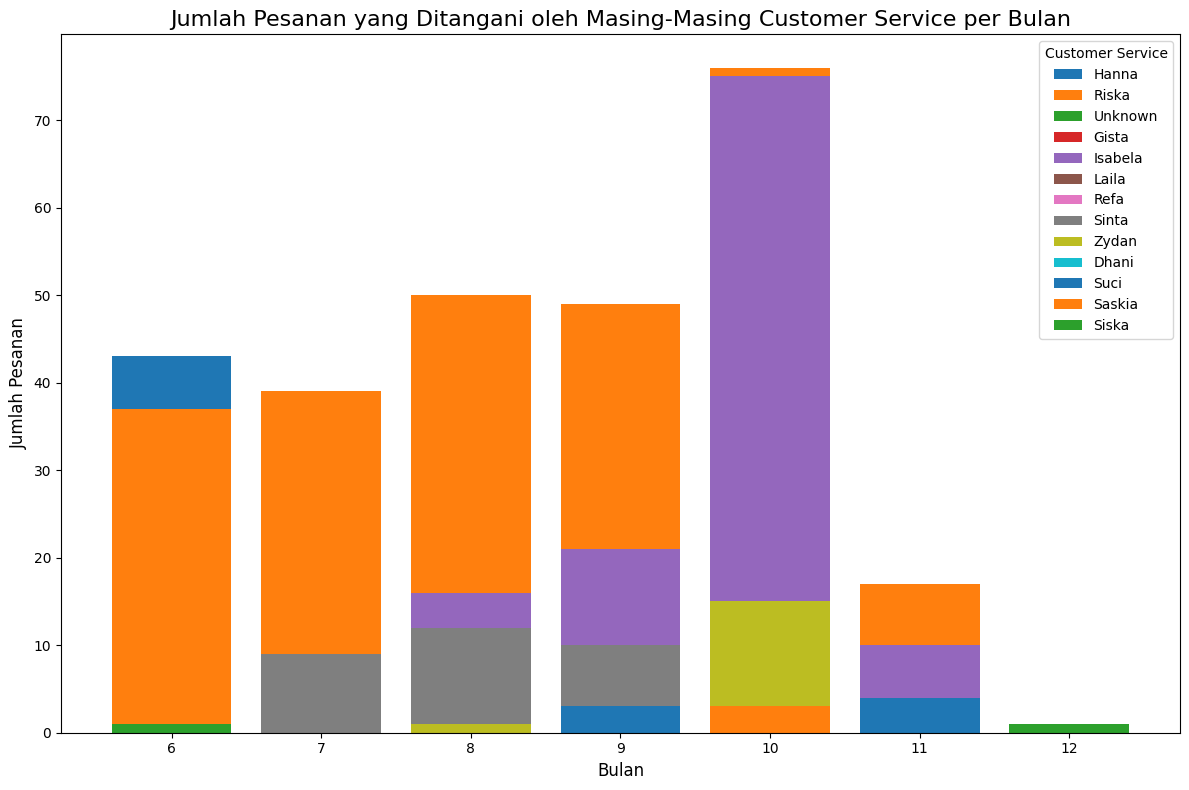

In [132]:
# Menghitung jumlah pesanan per customer service dan bulan
pesanan_per_staf_bulan = delivered.groupby(['Month', 'Remark 1']).size().reset_index(name='Jumlah_Pesanan')

# Menampilkan laporan dalam bentuk tabel
print("Laporan Kinerja Customer Service Per Bulan:")
print(pesanan_per_staf_bulan)

# Membuat bar plot untuk visualisasi
plt.figure(figsize=(12, 8))

# Plot berdasarkan bulan dan customer service
for staf in pesanan_per_staf_bulan['Remark 1'].unique():
    data_staf = pesanan_per_staf_bulan[pesanan_per_staf_bulan['Remark 1'] == staf]
    plt.bar(data_staf['Month'].astype(str), data_staf['Jumlah_Pesanan'], label=staf)

# Memberikan judul dan label sumbu
plt.title('Jumlah Pesanan yang Ditangani oleh Masing-Masing Customer Service per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)

# Menambahkan legenda
plt.legend(title='Customer Service')

# Menampilkan plot
plt.tight_layout()
plt.show()

#### 4.8.1. Simpan Data

In [136]:
pesanan_per_staf_bulan.to_excel('Laporan Kinerja Customer Service Per Bulan.xlsx', index=False, engine='openpyxl')

Analisis Perilaku Konsumen 